# Data Exploration

In [2]:
import pandas as pd
import numpy as np
df_rcc = pd.read_excel('MLDatasetECT.xlsx', sheet_name='result_constituencies_Candidate') 
df_rcp = pd.read_excel('MLDatasetECT.xlsx', sheet_name='result_constituencies_PartyList') 
df_rcc

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


In [3]:
df_rcp

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503
...,...,...,...,...
26795,YST_3,780,145,0.13871
26796,YST_3,781,412,0.39414
26797,YST_3,783,17,0.01626
26798,YST_3,784,138,0.13202


# Preprocessing Data for using with assumption

- Drop column that unnessesary with assumption

In [4]:
df_rcc_cf = df_rcc.drop(columns=['mp_app_id','mp_app_rank','mp_app_vote'],axis=1)
df_rcp_cf = df_rcp.drop(columns=['party_list_vote'],axis=1)

# Experiment #1

## Preprocessing data

- Merge data to make dimention match

In [5]:
merge_dataframe = df_rcp_cf.merge(df_rcc_cf, on=['party_id','cons_id'], how='outer')
merge_dataframe.fillna(0, inplace=True)
merge_dataframe
# merge_dataframe.to_excel('merge_dataframe.xlsx',index=False)

,cons_id,party_id,party_list_vote_percent,mp_app_vote_percent
0,ACR_1,701,4.30977,15.08515
1,ACR_1,702,0.17523,0.00000
2,ACR_1,703,0.06346,0.00000
3,ACR_1,705,31.80328,20.25878
4,ACR_1,706,0.12503,0.43477
...,...,...,...,...
26799,YST_3,786,0.08131,0.00000
26800,CMI_6,713,0.00000,0.43918
26801,CMI_7,713,0.00000,0.45125
26802,NMA_1,720,0.00000,0.23067


- Plot to searching for extreme value

c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


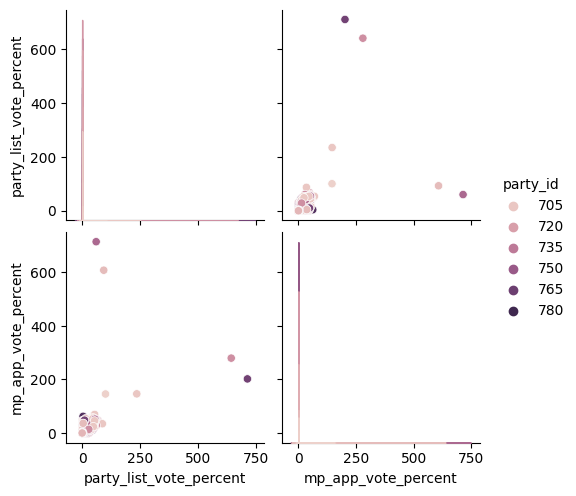

In [6]:
import seaborn as sns
sns.pairplot(merge_dataframe,hue='party_id')

- Describe a dataframe to watch value of outlier

In [7]:
merge_dataframe.describe()

,party_id,party_list_vote_percent,mp_app_vote_percent
count,26804.00000,26804.000000,26804.000000
mean,742.95094,1.478422,1.466750
std,25.12372,8.654854,8.692204
min,701.00000,0.000000,0.000000
25%,722.00000,0.021538,0.000000
50%,741.00000,0.070710,0.000000
75%,767.00000,0.220658,0.000000
max,786.00000,711.247710,714.909760


- Removing outlier by using z-score method

In [8]:
from scipy import stats
import numpy as np
columns_to_clean = ['party_list_vote_percent', 'mp_app_vote_percent']
z_scores = np.abs(stats.zscore(merge_dataframe[columns_to_clean]))
# Set a threshold for outlier detection
threshold = 10.0  # You can adjust this threshold as needed
# Create a boolean mask for non-outliers
outlier_mask = (z_scores < threshold).all(axis=1)
# Create a cleaned DataFrame by applying the mask
cleaned_df = merge_dataframe[outlier_mask]
# Print the cleaned DataFrame
cleaned_df

,cons_id,party_id,party_list_vote_percent,mp_app_vote_percent
0,ACR_1,701,4.30977,15.08515
1,ACR_1,702,0.17523,0.00000
2,ACR_1,703,0.06346,0.00000
3,ACR_1,705,31.80328,20.25878
4,ACR_1,706,0.12503,0.43477
...,...,...,...,...
26799,YST_3,786,0.08131,0.00000
26800,CMI_6,713,0.00000,0.43918
26801,CMI_7,713,0.00000,0.45125
26802,NMA_1,720,0.00000,0.23067


- Plot to recheck data

c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


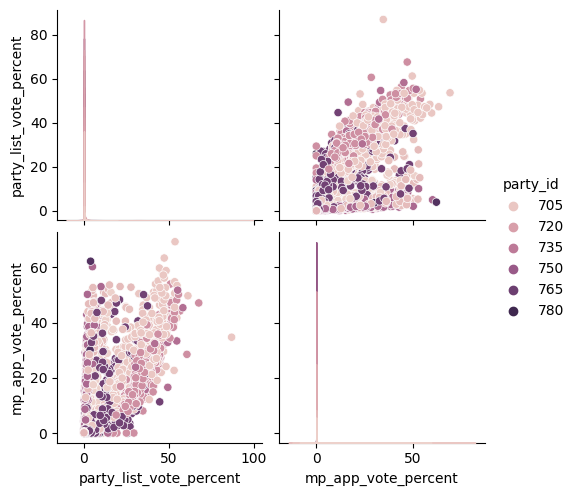

In [9]:
import seaborn as sns
sns.pairplot(cleaned_df,hue='party_id')

In [10]:
cleaned_df.describe()

,party_id,party_list_vote_percent,mp_app_vote_percent
count,26798.000000,26798.000000,26798.000000
mean,742.955071,1.410036,1.388803
std,25.122788,6.163410,6.071663
min,701.000000,0.000000,0.000000
25%,722.000000,0.021522,0.000000
50%,741.000000,0.070690,0.000000
75%,767.000000,0.220577,0.000000
max,786.000000,87.018470,69.347580


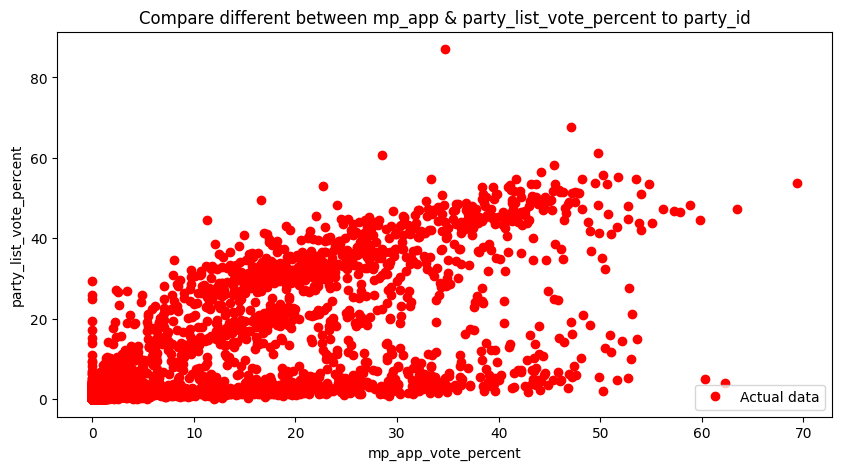

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = cleaned_df['mp_app_vote_percent']
gy = cleaned_df['party_list_vote_percent']
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

- Check correration between feature

In [12]:
cleaned_df_correlation = cleaned_df.corr()
cleaned_df_correlation

C:\Users\natch\AppData\Local\Temp\ipykernel_1512\3333717327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_df_correlation = cleaned_df.corr()


,party_id,party_list_vote_percent,mp_app_vote_percent
party_id,1.000000,-0.154675,-0.180551
party_list_vote_percent,-0.154675,1.000000,0.808137
mp_app_vote_percent,-0.180551,0.808137,1.000000


## Linear Regression Model

In [13]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Data preparation by spliting data to testing & training data

In [14]:
x = cleaned_df.mp_app_vote_percent.values.reshape(-1,1)
y = cleaned_df.party_list_vote_percent.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))

Size of x training: 21438
Size of y training: 21438
Size of x testing: 5360
Size of y testing: 5360


- Build Linear regression Model

In [15]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

#y = theta0 + theta1*x
print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  0.2729544129535033
Theta1:  0.8238827359810881
y = 0.2730+0.8239x


## Result of Linear Regression Model

### Predict on train model

In [16]:
y_pred = model_linear.predict(x_train)
y_pred

array([[0.27295441],
       [0.27295441],
       [0.27295441],
       ...,
       [0.27295441],
       [0.27295441],
       [0.58811428]])

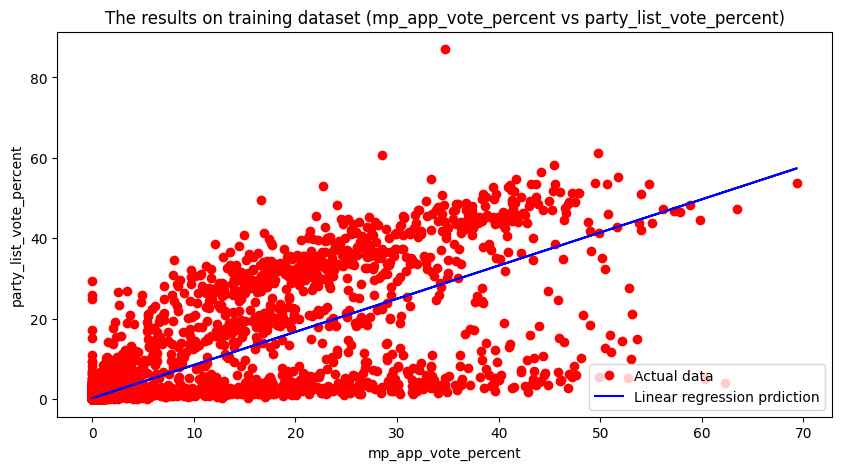

In [17]:
y_pred = model_linear.predict(x_train)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_train,y_train,'or',label = 'Actual data')
plt.plot(x_train,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [18]:
# Model measurement on trainig dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train,y_pred)),4)) #R-Square

MAE =  1.0042
MSE =  12.9866
RMSE =  3.6037
MAPE =  inf
R-Square =  0.809


C:\Users\natch\AppData\Local\Temp\ipykernel_1512\1425041426.py:3: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


### Predict on test model

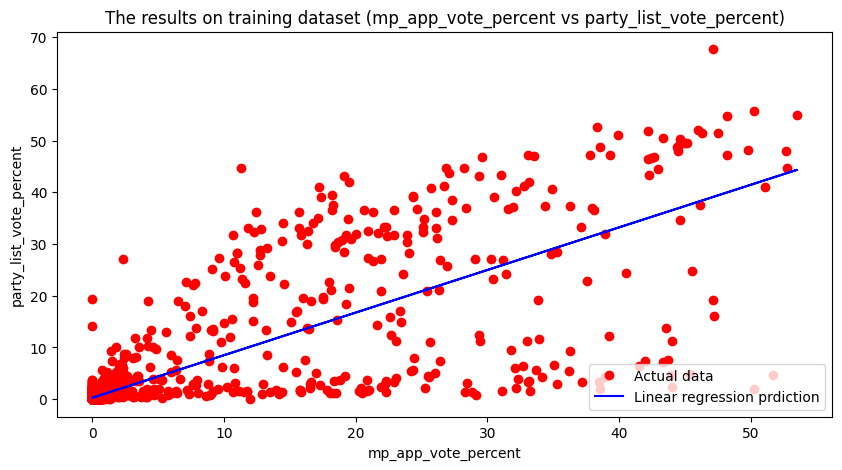

In [19]:
#Predict on trainig set
y_pred = model_linear.predict(x_test)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test,y_test,'or',label='Actual data')
plt.plot(x_test,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [20]:
print("MAE = ",round(metrics.mean_absolute_error(y_test,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test,y_pred)),4)) #R-Square

MAE =  1.0465
MSE =  13.9459
RMSE =  3.7344
MAPE =  inf
R-Square =  0.8049


C:\Users\natch\AppData\Local\Temp\ipykernel_1512\1425041426.py:3: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


# Experiment #2

## Preprocessing data

- Filter only bangkok constituency

In [21]:
filtered_df_rcc = df_rcc_cf[df_rcc_cf['cons_id'].str.contains('BKK')]
filtered_df_rcp = df_rcp_cf[df_rcp_cf['cons_id'].str.contains('BKK')]

- Sort cons_id and party_id feature

In [22]:
sorted_df_rcc = filtered_df_rcc.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcc = sorted_df_rcc[['cons_id','party_id','mp_app_vote_percent']]
sorted_df_rcc

,cons_id,party_id,mp_app_vote_percent
0,BKK_1,701,12.22791
1,BKK_1,705,16.19477
2,BKK_1,706,1.32088
3,BKK_1,709,0.69486
4,BKK_1,719,0.66203
...,...,...,...
493,BKK_9,729,0.55105
494,BKK_9,743,2.29602
495,BKK_9,762,1.87949
496,BKK_9,763,17.50174


In [23]:
sorted_df_rcp = filtered_df_rcp.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
sorted_df_rcp

,cons_id,party_id,party_list_vote_percent
0,BKK_1,701,3.78468
1,BKK_1,702,0.01165
2,BKK_1,703,0.01059
3,BKK_1,705,14.67794
4,BKK_1,706,1.77423
...,...,...,...
2206,BKK_9,780,0.04082
2207,BKK_9,781,0.04267
2208,BKK_9,783,0.00186
2209,BKK_9,784,0.06865


- Merge sorted_df_rcc and sorted_df_rcp together to make data related

In [24]:
merge_df = sorted_df_rcp.merge(sorted_df_rcc, on=['party_id','cons_id'], how='outer')
merge_df.fillna(0, inplace=True)
merge_df

,cons_id,party_id,party_list_vote_percent,mp_app_vote_percent
0,BKK_1,701,3.78468,12.22791
1,BKK_1,702,0.01165,0.00000
2,BKK_1,703,0.01059,0.00000
3,BKK_1,705,14.67794,16.19477
4,BKK_1,706,1.77423,1.32088
...,...,...,...,...
2206,BKK_9,780,0.04082,0.00000
2207,BKK_9,781,0.04267,0.00000
2208,BKK_9,783,0.00186,0.00000
2209,BKK_9,784,0.06865,0.00000


- Plot to watch result of cleaning data

c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


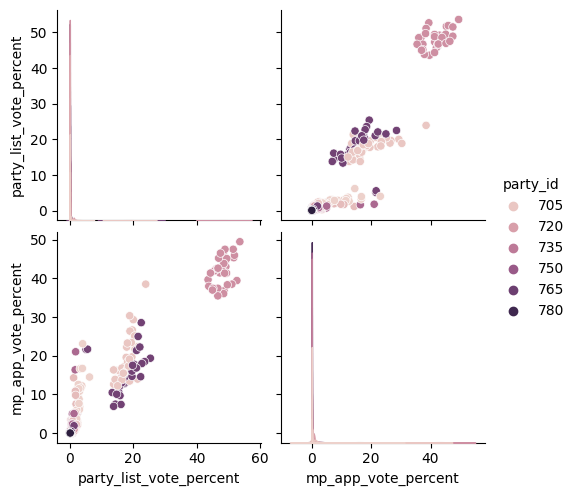

In [25]:
sns.pairplot(merge_df,hue='party_id')

- Describing result of cleaning data

In [26]:
merge_df.describe()

,party_id,party_list_vote_percent,mp_app_vote_percent
count,2211.000000,2211.000000,2211.000000
mean,742.955224,1.443707,1.424917
std,25.128327,6.593106,6.077960
min,701.000000,0.000000,0.000000
25%,722.000000,0.009915,0.000000
50%,741.000000,0.030130,0.000000
75%,767.000000,0.100530,0.000000
max,786.000000,53.654200,49.469070


- Plot to watch behavior of each feature

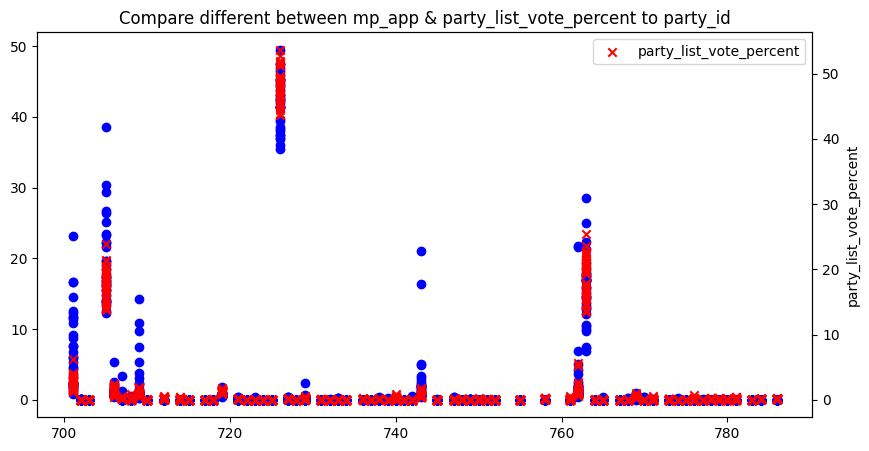

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df['party_id']
gy1 = merge_df['mp_app_vote_percent']
gy2 = merge_df['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('party_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

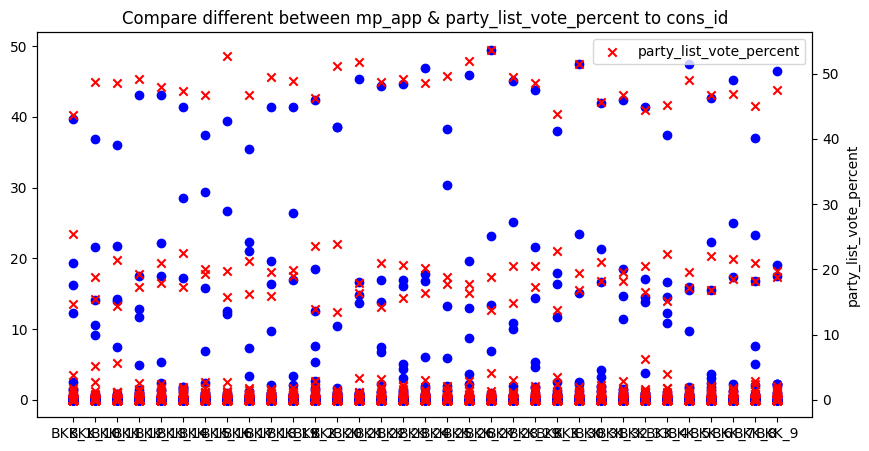

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to cons_id")
gx = merge_df['cons_id']
gy1 = merge_df['mp_app_vote_percent']
gy2 = merge_df['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('cons_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

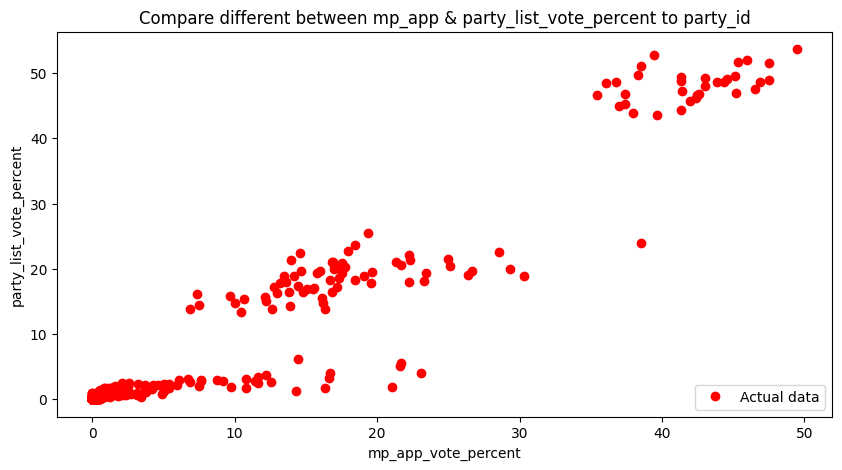

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df['mp_app_vote_percent']
gy = merge_df['party_list_vote_percent']
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

- Check correlation between feature

In [30]:
merge_df_correlation = merge_df.corr()
merge_df_correlation

C:\Users\natch\AppData\Local\Temp\ipykernel_1512\42463802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merge_df_correlation = merge_df.corr()


,party_id,party_list_vote_percent,mp_app_vote_percent
party_id,1.000000,-0.117331,-0.150319
party_list_vote_percent,-0.117331,1.000000,0.968459
mp_app_vote_percent,-0.150319,0.968459,1.000000


## Linear Regression Model

In [31]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Data preparation by spliting data to testing & training data

In [32]:
x = merge_df.mp_app_vote_percent.values.reshape(-1,1)
y = merge_df.party_list_vote_percent.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))

Size of x training: 1768
Size of y training: 1768
Size of x testing: 443
Size of y testing: 443


- Build Linear Regression Model

In [33]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

#y = theta0 + theta1*x
print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  -0.054875885970509186
Theta1:  1.0413479369847922
y = -0.0549+1.0413x


## Result of Linear Regression Model

### Predict on train model

In [34]:
y_pred = model_linear.predict(x_train)
y_pred

array([[-0.05487589],
       [-0.05487589],
       [-0.05487589],
       ...,
       [-0.05487589],
       [-0.05487589],
       [-0.05487589]])

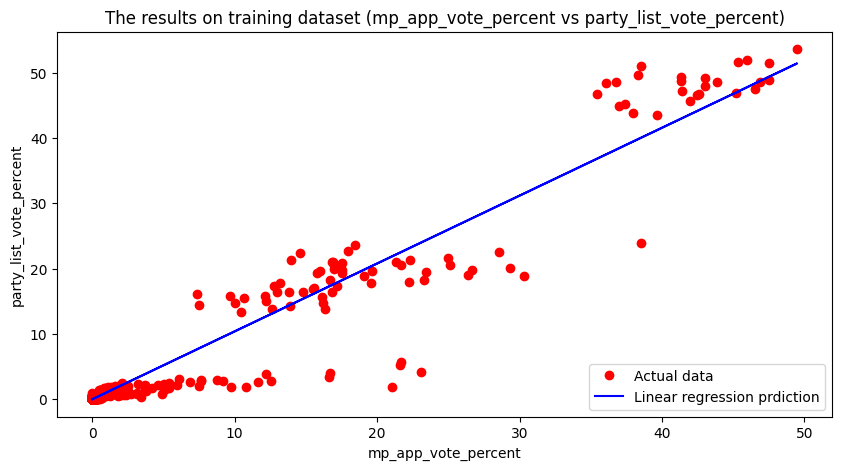

In [35]:
#Predict on trainig set
y_pred = model_linear.predict(x_train)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_train,y_train,'or',label = 'Actual data')
plt.plot(x_train,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()


In [36]:
# Model measurement on trainig dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train,y_pred)),4)) #R-Square

MAE =  0.4399
MSE =  2.7334
RMSE =  1.6533
MAPE =  inf
R-Square =  0.9678


C:\Users\natch\AppData\Local\Temp\ipykernel_1512\1425041426.py:3: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


### Predict on test model

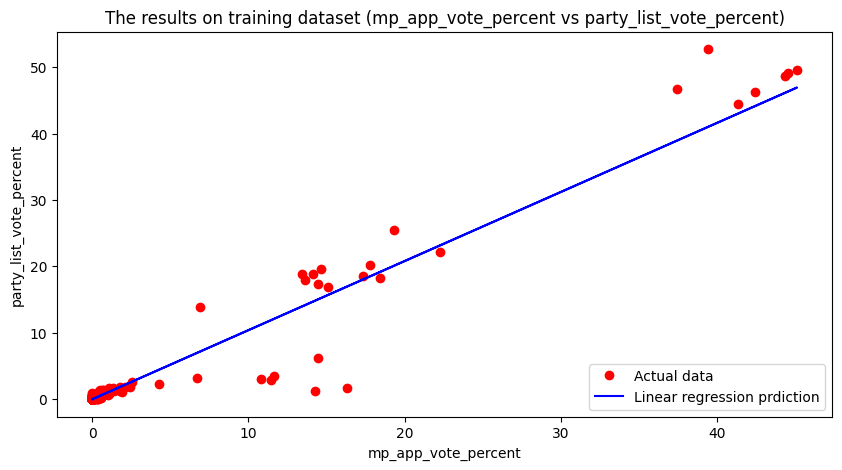

In [37]:
#Predict on trainig set
y_pred = model_linear.predict(x_test)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test,y_test,'or',label='Actual data')
plt.plot(x_test,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [38]:
print("MAE = ",round(metrics.mean_absolute_error(y_test,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test,y_pred)),4)) #R-Square

MAE =  0.4343
MSE =  2.5716
RMSE =  1.6036
MAPE =  528.4736
R-Square =  0.971


# Experiment #3

## Preprocessing data

In [39]:
sorted_df_rcc

,cons_id,party_id,mp_app_vote_percent
0,BKK_1,701,12.22791
1,BKK_1,705,16.19477
2,BKK_1,706,1.32088
3,BKK_1,709,0.69486
4,BKK_1,719,0.66203
...,...,...,...
493,BKK_9,729,0.55105
494,BKK_9,743,2.29602
495,BKK_9,762,1.87949
496,BKK_9,763,17.50174


In [40]:
sorted_df_rcp

,cons_id,party_id,party_list_vote_percent
0,BKK_1,701,3.78468
1,BKK_1,702,0.01165
2,BKK_1,703,0.01059
3,BKK_1,705,14.67794
4,BKK_1,706,1.77423
...,...,...,...
2206,BKK_9,780,0.04082
2207,BKK_9,781,0.04267
2208,BKK_9,783,0.00186
2209,BKK_9,784,0.06865


- Merge data without caring about 

In [41]:
merge_df2 = sorted_df_rcc.merge(sorted_df_rcp, on=['party_id','cons_id'], how='inner')
merge_df2

,cons_id,party_id,mp_app_vote_percent,party_list_vote_percent
0,BKK_1,701,12.22791,3.78468
1,BKK_1,705,16.19477,14.67794
2,BKK_1,706,1.32088,1.77423
3,BKK_1,709,0.69486,0.72134
4,BKK_1,719,0.66203,1.37384
...,...,...,...,...
493,BKK_9,729,0.55105,0.12245
494,BKK_9,743,2.29602,0.86460
495,BKK_9,762,1.87949,1.33587
496,BKK_9,763,17.50174,19.81539


- Plot to watch result of merging data

c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


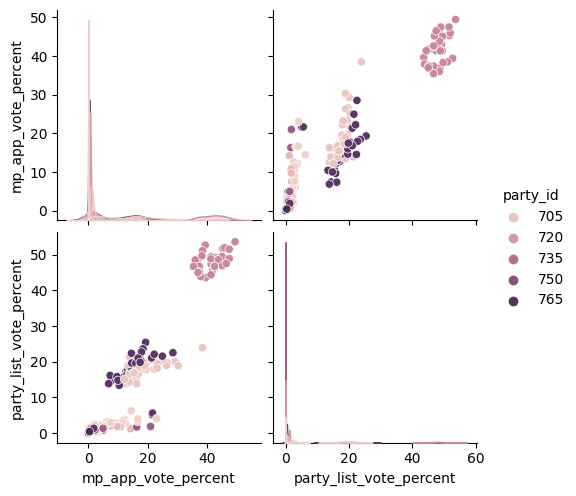

In [42]:
sns.pairplot(merge_df2,hue='party_id')

- Describing result of merging data

In [43]:
merge_df2.describe()

,party_id,mp_app_vote_percent,party_list_vote_percent
count,498.000000,498.000000,498.000000
mean,731.753012,6.326287,6.253402
std,23.600831,11.541127,12.781006
min,701.000000,0.000000,0.002950
25%,708.250000,0.279303,0.087487
50%,727.000000,0.726015,0.757095
75%,761.000000,5.801823,2.166140
max,777.000000,49.469070,53.654200


- Plot to watch behavior of each feature

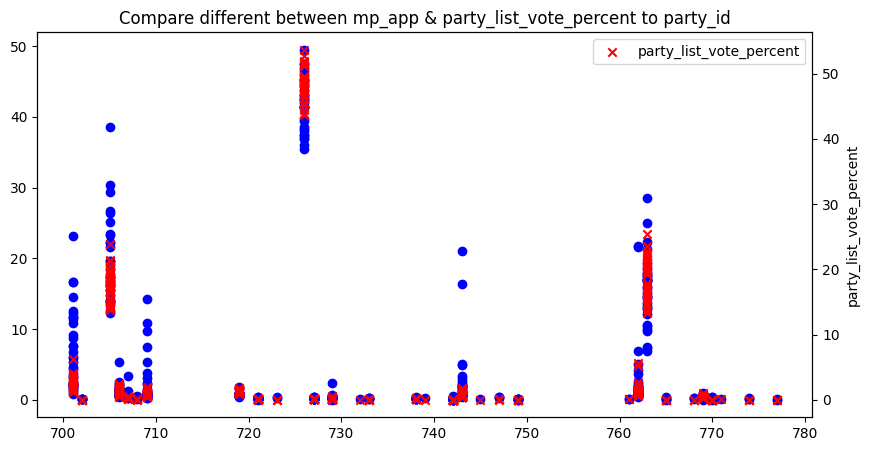

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df2['party_id']
gy1 = merge_df2['mp_app_vote_percent']
gy2 = merge_df2['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('party_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

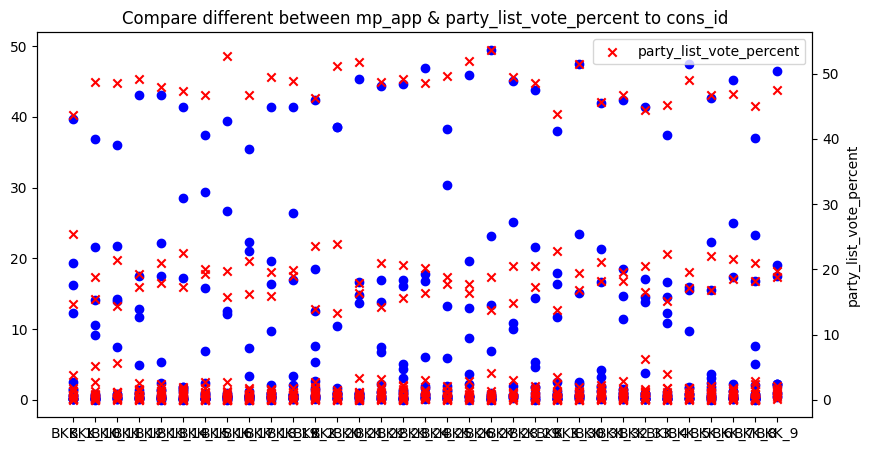

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to cons_id")
gx = merge_df2['cons_id']
gy1 = merge_df2['mp_app_vote_percent']
gy2 = merge_df2['party_list_vote_percent']
plt.scatter(gx,gy1,label='mp_app_vote_percent',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote_percent',color='red',marker='x')
plt.xlabel('cons_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

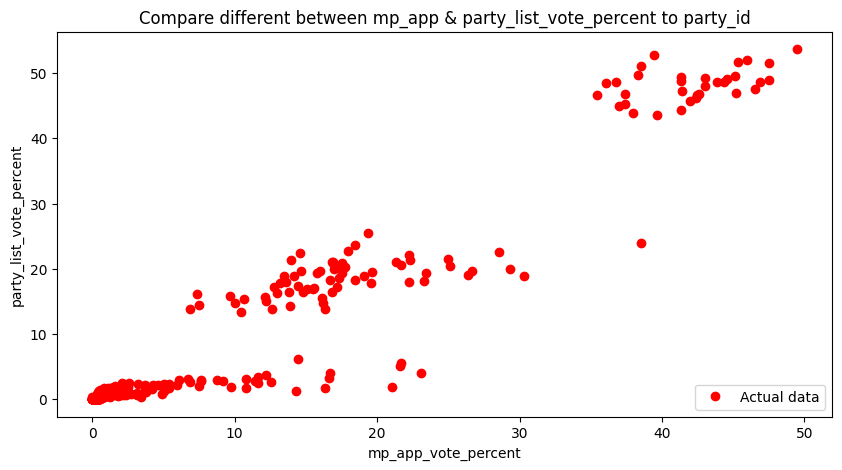

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df2['mp_app_vote_percent']
gy = merge_df2['party_list_vote_percent']
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

- Check correration between feature

In [47]:
df_correlation2 = merge_df2.corr()
df_correlation2

C:\Users\natch\AppData\Local\Temp\ipykernel_1512\939840873.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation2 = merge_df2.corr()


,party_id,mp_app_vote_percent,party_list_vote_percent
party_id,1.000000,-0.114091,-0.056344
mp_app_vote_percent,-0.114091,1.000000,0.963215
party_list_vote_percent,-0.056344,0.963215,1.000000


## Linear Regression Model

- Data preparation by spilting data to testing & training

In [48]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data preparation by spilting data to trainig and testing
x_2 = merge_df2.mp_app_vote_percent.values.reshape(-1,1)
y_2 = merge_df2.party_list_vote_percent.values.reshape(-1,1)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_2,y_2,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train_2))
print('Size of y training:',len(y_train_2))
print('Size of x testing:',len(x_test_2))
print('Size of y testing:',len(y_test_2))

Size of x training: 398
Size of y training: 398
Size of x testing: 100
Size of y testing: 100


- Build Linear regression model

In [49]:
#Build linear regression model
model_linear_2 = LinearRegression()
model_linear_2.fit(x_train_2,y_train_2)

#y = theta0 + theta1*x
print("Theta0: ",model_linear_2.intercept_[0])
print("Theta1: ",model_linear_2.coef_[0][0])
print("y_2 = {:.4f}+{:.4f}x_2".format(model_linear_2.intercept_[0],model_linear_2.coef_[0][0]))

Theta0:  -0.5045771380246284
Theta1:  1.0611920899690799
y_2 = -0.5046+1.0612x_2


## Result Linear Regression Model

### Predict on training set

In [50]:
y_pred_2 = model_linear_2.predict(x_train_2)
y_pred_2

array([[ 1.28237939e+01],
       [-2.95745147e-01],
       [-5.04577138e-01],
       [-3.98680779e-01],
       [ 4.15780139e+01],
       [ 1.24574067e+01],
       [-2.19954808e-01],
       [ 8.20299962e-01],
       [ 5.19916086e+01],
       [ 5.44517362e-01],
       [ 4.01690055e+01],
       [-3.47212963e-01],
       [-1.24917540e-02],
       [-2.07825382e-01],
       [ 4.99106003e+01],
       [-3.01401300e-01],
       [ 4.40075177e+01],
       [ 1.88572621e+00],
       [ 4.74446848e-01],
       [-1.34772919e-01],
       [-3.15302917e-01],
       [ 4.14903360e-01],
       [-4.18026311e-01],
       [ 8.06663644e-01],
       [ 1.72219894e+01],
       [ 3.52632608e-01],
       [-2.39300339e-01],
       [ 8.01927632e-02],
       [-2.36201658e-01],
       [-4.08263344e-01],
       [ 3.73962569e-01],
       [ 1.80552131e+00],
       [ 3.23511279e-03],
       [ 4.72609173e+00],
       [ 1.37570487e+01],
       [ 1.97485923e+01],
       [-8.81759738e-02],
       [ 8.66026730e-01],
       [ 1.4

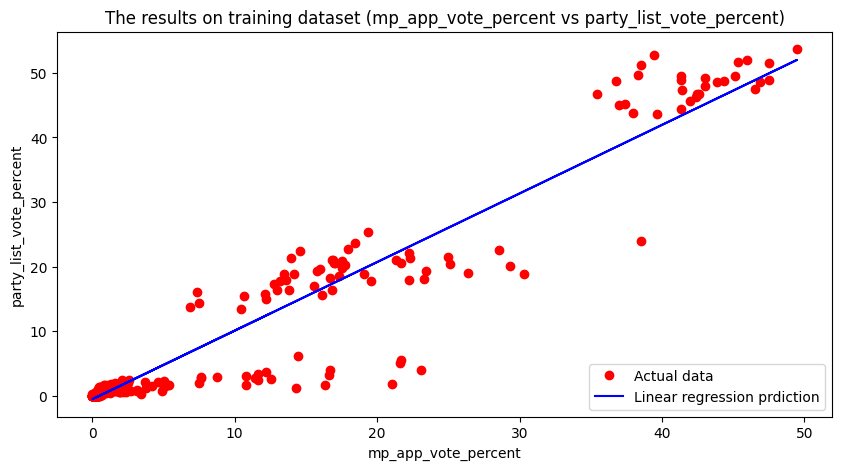

In [51]:
#Predict on training set
y_pred_2 = model_linear_2.predict(x_train_2)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_train_2,y_train_2,'or',label = 'Actual data')
plt.plot(x_train_2,y_pred_2,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [52]:
# Model measurement on training dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train_2,y_pred_2),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train_2,y_pred_2),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train_2,y_pred_2)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train_2,y_pred_2),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train_2,y_pred_2)),4)) #R-Square

MAE =  1.8412
MSE =  13.3545
RMSE =  3.6544
MAPE =  611.8027
R-Square =  0.9612


### Predict on testing set

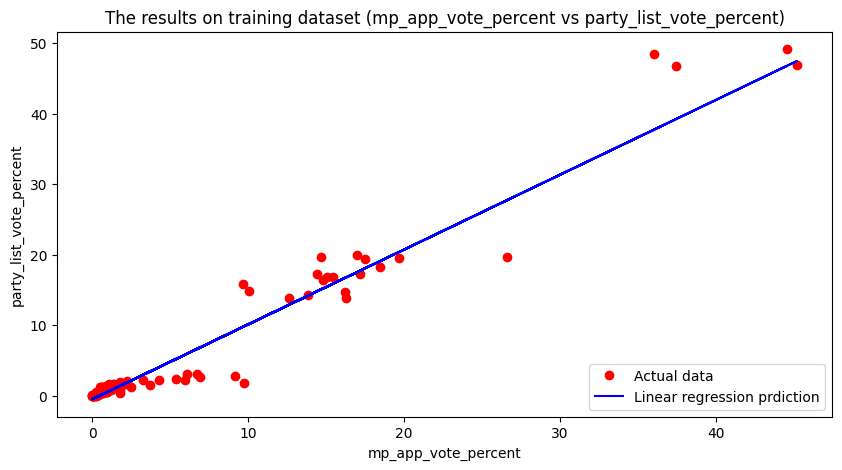

In [53]:
#Predict on training set
y_pred_2 = model_linear_2.predict(x_test_2)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test_2,y_test_2,'or',label='Actual data')
plt.plot(x_test_2,y_pred_2,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [54]:
print("MAE = ",round(metrics.mean_absolute_error(y_test_2,y_pred_2),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test_2,y_pred_2),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test_2,y_pred_2),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test_2,y_pred_2)),4)) #R-Square

MAE =  1.313
MSE =  5.5094
RMSE =  2.3472
MAPE =  721.1345
R-Square =  0.9752


# Experiment #4

In [55]:
df_rcc

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


In [56]:
df_rcc_drop = df_rcc.drop(columns=['mp_app_id','mp_app_rank','mp_app_vote_percent'],axis=1)
df_rcp_drop = df_rcp.drop(columns=['party_list_vote_percent'],axis=1)

In [57]:
filtered_df_rcc = df_rcc_drop[df_rcc_drop['cons_id'].str.contains('BKK')]
filtered_df_rcp = df_rcp_drop[df_rcp_drop['cons_id'].str.contains('BKK')]

In [58]:
merge_df3 = filtered_df_rcp.merge(filtered_df_rcc, on=['party_id','cons_id'], how='outer')
merge_df3.fillna(0, inplace=True)
merge_df3

,cons_id,party_id,party_list_vote,mp_app_vote
0,BKK_1,701,3573,11544.0
1,BKK_1,702,11,0.0
2,BKK_1,703,10,0.0
3,BKK_1,705,13857,15289.0
4,BKK_1,706,1675,1247.0
...,...,...,...,...
2206,BKK_9,780,44,0.0
2207,BKK_9,781,46,0.0
2208,BKK_9,783,2,0.0
2209,BKK_9,784,74,0.0


c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


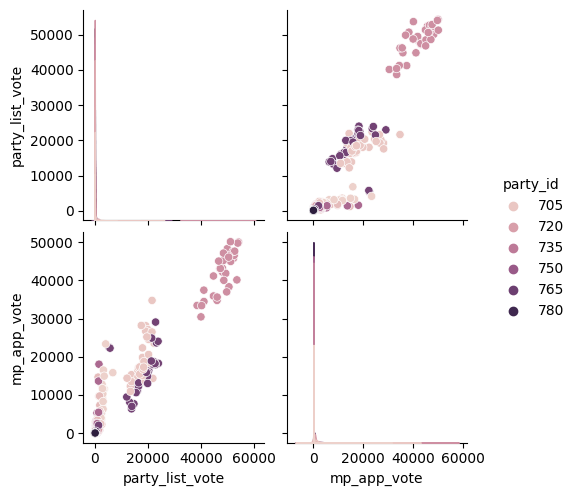

In [59]:
sns.pairplot(merge_df3,hue='party_id')

In [60]:
merge_df3.describe() 

,party_id,party_list_vote,mp_app_vote
count,2211.000000,2211.000000,2211.000000
mean,742.955224,1446.883311,1427.991407
std,25.128327,6624.614784,6114.731467
min,701.000000,0.000000,0.000000
25%,722.000000,10.000000,0.000000
50%,741.000000,30.000000,0.000000
75%,767.000000,100.000000,0.000000
max,786.000000,54268.000000,50132.000000


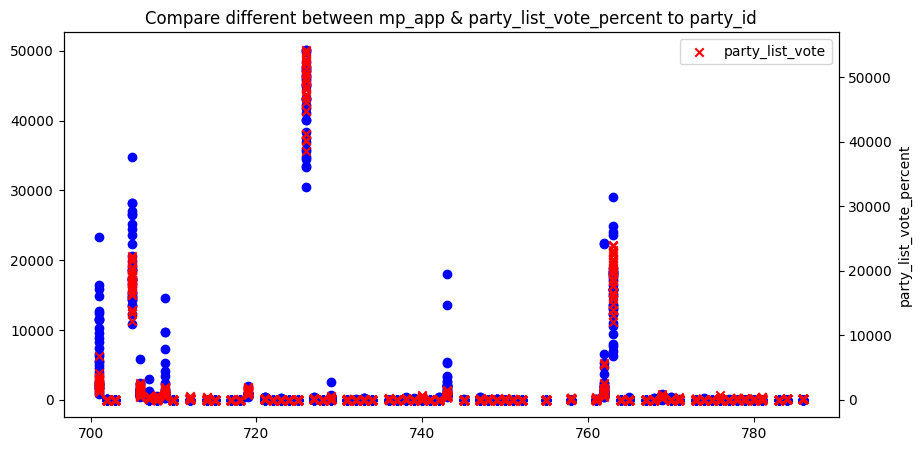

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df3['party_id']
gy1 = merge_df3['mp_app_vote']
gy2 = merge_df3['party_list_vote']
plt.scatter(gx,gy1,label='mp_app_vote',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote',color='red',marker='x')
plt.xlabel('party_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

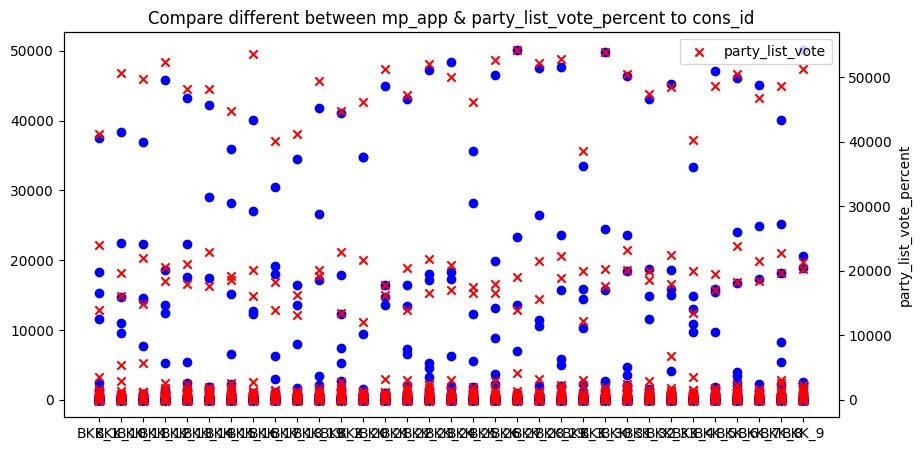

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to cons_id")
gx = merge_df3['cons_id']
gy1 = merge_df3['mp_app_vote']
gy2 = merge_df3['party_list_vote']
plt.scatter(gx,gy1,label='mp_app_vote',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote',color='red',marker='x')
plt.xlabel('cons_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

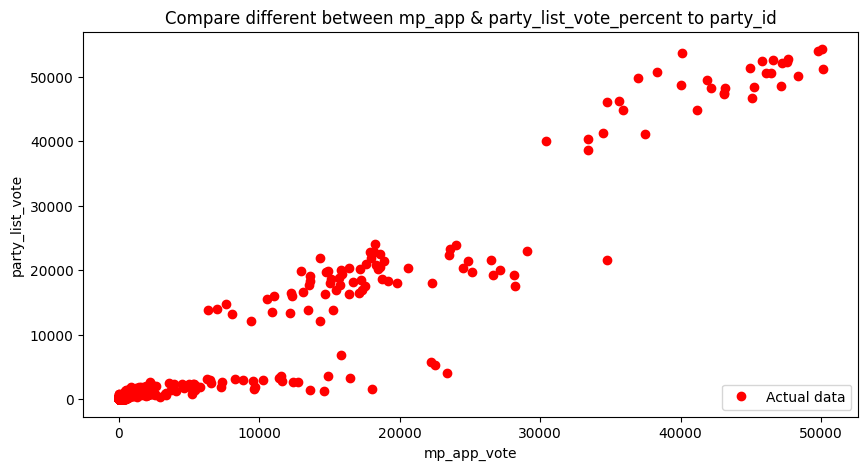

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df3['mp_app_vote']
gy = merge_df3['party_list_vote']
plt.xlabel('mp_app_vote')
plt.ylabel('party_list_vote')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

In [64]:
df_correlation3 = merge_df3.corr()
df_correlation3

C:\Users\natch\AppData\Local\Temp\ipykernel_1512\2915679550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation3 = merge_df3.corr()


,party_id,party_list_vote,mp_app_vote
party_id,1.000000,-0.117082,-0.149274
party_list_vote,-0.117082,1.000000,0.970326
mp_app_vote,-0.149274,0.970326,1.000000


## Linear Regression Model

- Data preparation by spilting data to testing & training

In [65]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data preparation by spilting data to trainig and testing
x_3 = merge_df3.mp_app_vote.values.reshape(-1,1)
y_3 = merge_df3.party_list_vote.values.reshape(-1,1)
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(x_3,y_3,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train_3))
print('Size of y training:',len(y_train_3))
print('Size of x testing:',len(x_test_3))
print('Size of y testing:',len(y_test_3))

Size of x training: 1768
Size of y training: 1768
Size of x testing: 443
Size of y testing: 443


- Build Linear regression model

In [66]:
#Build linear regression model
model_linear_3 = LinearRegression()
model_linear_3.fit(x_train_3,y_train_3)

#y = theta0 + theta1*x
print("Theta0: ",model_linear_3.intercept_[0])
print("Theta1: ",model_linear_3.coef_[0][0])
print("y_3 = {:.4f}+{:.4f}x_3".format(model_linear_3.intercept_[0],model_linear_3.coef_[0][0]))

Theta0:  -55.94710713206632
Theta1:  1.0412738921258595
y_3 = -55.9471+1.0413x_3


## Result Linear Regression Model

### Predict on training set

In [67]:
y_pred_3 = model_linear_3.predict(x_train_3)
y_pred_3

array([[-55.94710713],
       [-55.94710713],
       [-55.94710713],
       ...,
       [-55.94710713],
       [-55.94710713],
       [-55.94710713]])

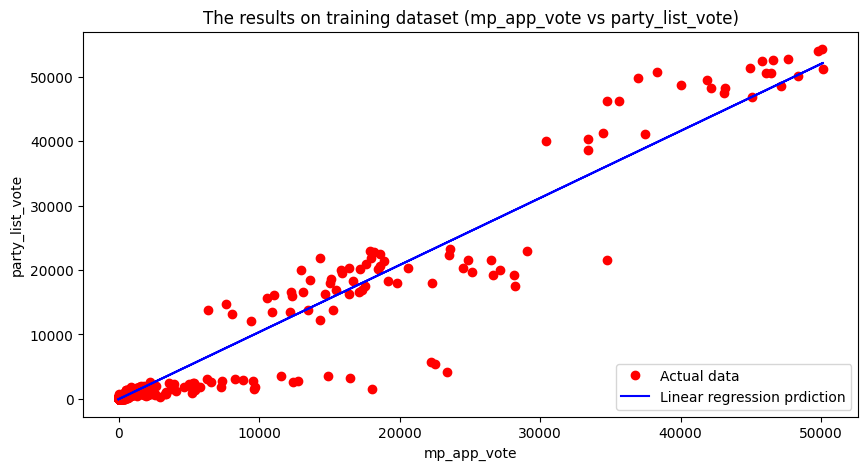

In [68]:
#Predict on training set
y_pred_3 = model_linear_3.predict(x_train_3)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote vs party_list_vote)')
plt.xlabel('mp_app_vote')
plt.ylabel('party_list_vote')
plt.plot(x_train_3,y_train_3,'or',label = 'Actual data')
plt.plot(x_train_3,y_pred_3,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [69]:
# Model measurement on training dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train_3,y_pred_3),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train_3,y_pred_3),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train_3,y_pred_3)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train_3,y_pred_3),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train_3,y_pred_3)),4)) #R-Square

MAE =  435.7397
MSE =  2596258.1238
RMSE =  1611.2908
MAPE =  inf
R-Square =  0.9695


C:\Users\natch\AppData\Local\Temp\ipykernel_1512\2816011924.py:3: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


### Predict on testing set

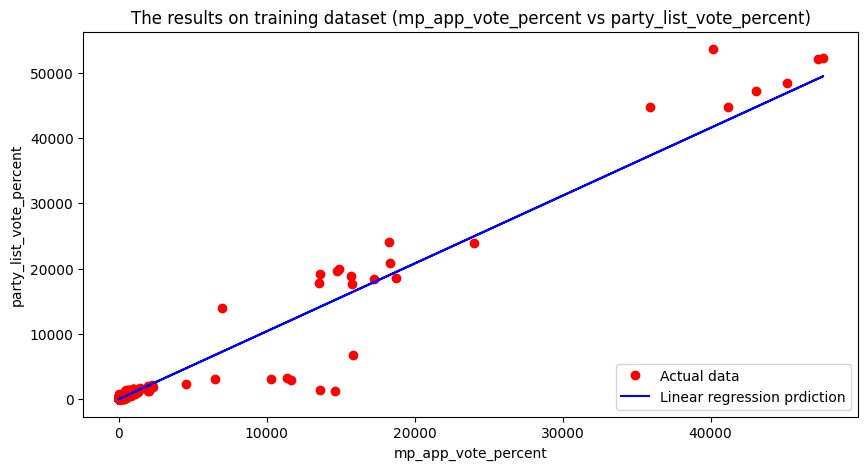

In [70]:
#Predict on training set
y_pred_3 = model_linear_3.predict(x_test_3)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test_3,y_test_3,'or',label='Actual data')
plt.plot(x_test_3,y_pred_3,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [71]:
print("MAE = ",round(metrics.mean_absolute_error(y_test_3,y_pred_3),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test_3,y_pred_3),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test_3,y_pred_3)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test_3,y_pred_3),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test_3,y_pred_3)),4)) #R-Square

MAE =  431.8353
MSE =  2458652.5982
RMSE =  1568.0091
MAPE =  538.3447
R-Square =  0.9733


# Experiment#5

In [74]:
merge_df4 = filtered_df_rcc.merge(filtered_df_rcp, on=['party_id','cons_id'], how='inner')
merge_df4

,cons_id,mp_app_vote,party_id,party_list_vote
0,BKK_1,18261,763,23999
1,BKK_1,11544,701,3573
2,BKK_1,1495,743,744
3,BKK_1,130,733,45
4,BKK_1,625,719,1297
...,...,...,...,...
493,BKK_9,2372,701,1842
494,BKK_9,466,769,432
495,BKK_9,18866,763,21360
496,BKK_9,2475,743,932


c:\Users\natch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


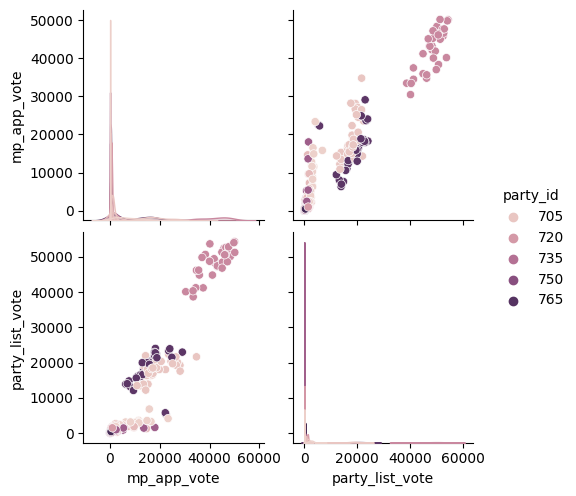

In [75]:
sns.pairplot(merge_df4,hue='party_id')

In [76]:
merge_df4.describe() 

,mp_app_vote,party_id,party_list_vote
count,498.000000,498.000000,498.000000
mean,6339.937751,731.753012,6268.730924
std,11621.403211,23.600831,12847.418130
min,0.000000,701.000000,3.000000
25%,268.500000,708.250000,90.000000
50%,724.000000,727.000000,748.500000
75%,5708.250000,761.000000,2286.000000
max,50132.000000,777.000000,54268.000000


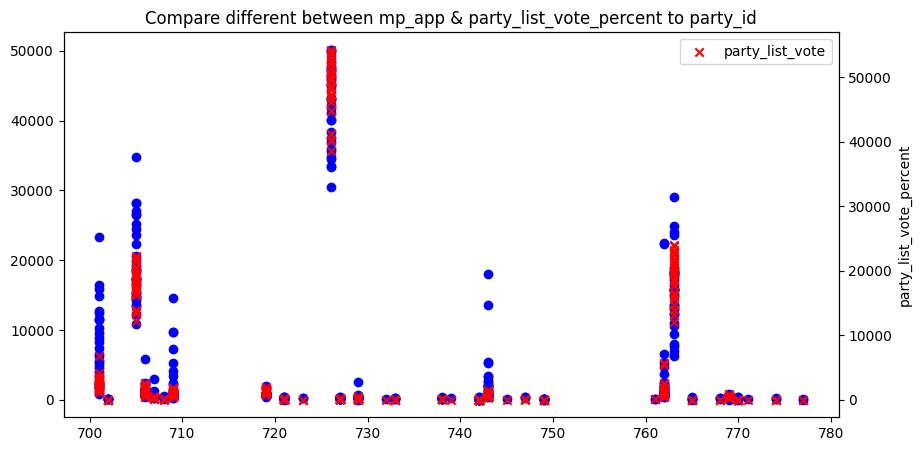

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df4['party_id']
gy1 = merge_df4['mp_app_vote']
gy2 = merge_df4['party_list_vote']
plt.scatter(gx,gy1,label='mp_app_vote',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote',color='red',marker='x')
plt.xlabel('party_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

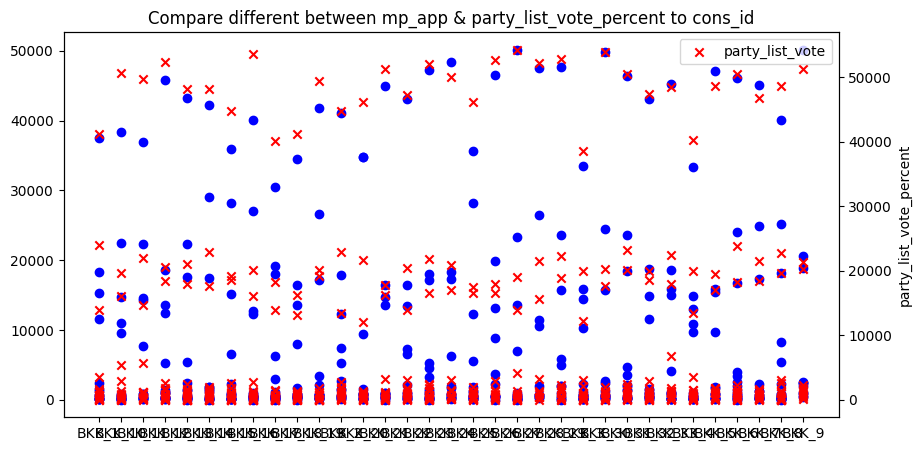

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to cons_id")
gx = merge_df4['cons_id']
gy1 = merge_df4['mp_app_vote']
gy2 = merge_df4['party_list_vote']
plt.scatter(gx,gy1,label='mp_app_vote',color='blue',marker='o')
ax2 = plt.twinx()
plt.scatter(gx,gy2,label='party_list_vote',color='red',marker='x')
plt.xlabel('cons_id')
plt.ylabel('mp_app_vote_percent')
ax2.set_ylabel('party_list_vote_percent')
plt.legend(loc='upper right')

plt.show()

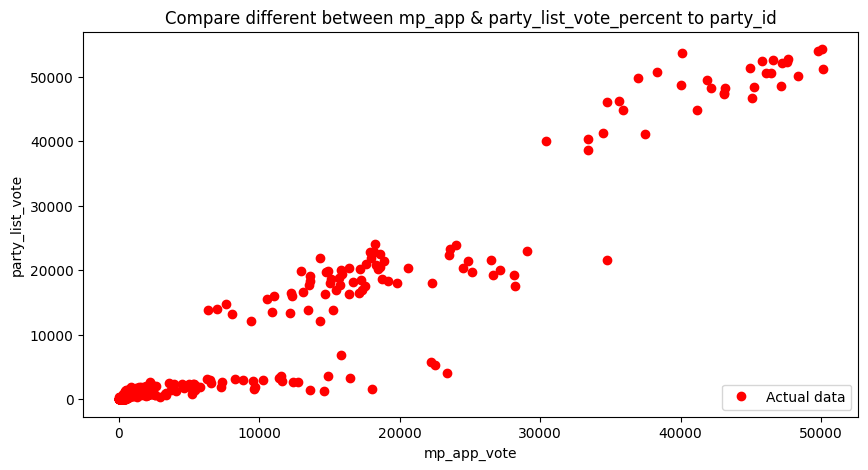

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Compare different between mp_app & party_list_vote_percent to party_id")
gx = merge_df4['mp_app_vote']
gy = merge_df4['party_list_vote']
plt.xlabel('mp_app_vote')
plt.ylabel('party_list_vote')
plt.plot(gx,gy,'or',label = 'Actual data')
plt.legend(loc="lower right")
plt.show()

In [80]:
df_correlation4 = merge_df4.corr()
df_correlation4

C:\Users\natch\AppData\Local\Temp\ipykernel_1512\1511101170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation4 = merge_df4.corr()


,mp_app_vote,party_id,party_list_vote
mp_app_vote,1.000000,-0.112392,0.965461
party_id,-0.112392,1.000000,-0.056190
party_list_vote,0.965461,-0.056190,1.000000


## Linear Regression Model

- Data preparation by spilting data to testing & training

In [83]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data preparation by spilting data to trainig and testing
x_4 = merge_df4.mp_app_vote.values.reshape(-1,1)
y_4 = merge_df4.party_list_vote.values.reshape(-1,1)
x_train_4,x_test_4,y_train_4,y_test_4 = train_test_split(x_4,y_4,test_size = 0.2,random_state = 0)
# Show size of training and testing
print('Size of x training:',len(x_train_4))
print('Size of y training:',len(y_train_4))
print('Size of x testing:',len(x_test_4))
print('Size of y testing:',len(y_test_4))

Size of x training: 398
Size of y training: 398
Size of x testing: 100
Size of y testing: 100


- Build Linear regression model

In [84]:
#Build linear regression model
model_linear_4 = LinearRegression()
model_linear_4.fit(x_train_4,y_train_4)

#y = theta0 + theta1*x
print("Theta0: ",model_linear_4.intercept_[0])
print("Theta1: ",model_linear_4.coef_[0][0])
print("y_4 = {:.4f}+{:.4f}x_4".format(model_linear_4.intercept_[0],model_linear_4.coef_[0][0]))

Theta0:  -516.7459683642301
Theta1:  1.072317684285393
y_4 = -516.7460+1.0723x_4


## Result Linear Regression Model

### Predict on training set

In [85]:
y_pred_4 = model_linear_4.predict(x_train_4)
y_pred_4

array([[ 1.09487559e+02],
       [-3.64476857e+02],
       [ 1.83463944e+04],
       [ 4.23877569e+04],
       [-4.40611413e+02],
       [ 1.11725891e+04],
       [ 4.26893594e+02],
       [-2.82980713e+02],
       [ 6.96052524e+03],
       [ 3.64363937e+04],
       [ 1.42200440e+03],
       [-5.45770464e+01],
       [-5.16745968e+02],
       [-3.74127716e+02],
       [-1.89689075e+02],
       [-2.06846158e+02],
       [-2.73329854e+02],
       [ 2.07290843e+04],
       [-5.16745968e+02],
       [-2.27220194e+02],
       [-3.13005608e+02],
       [ 6.38140178e+02],
       [ 2.90637329e+01],
       [ 1.58928596e+03],
       [ 9.82361346e+03],
       [-4.38466777e+02],
       [ 1.27853549e+04],
       [ 2.02679158e+03],
       [ 1.93135530e+03],
       [ 1.34148054e+04],
       [-2.77619125e+02],
       [-3.02282432e+02],
       [-3.75200034e+02],
       [ 4.85921870e+04],
       [ 5.11606691e+02],
       [ 5.32406842e+04],
       [ 8.72977750e+02],
       [-3.18367197e+02],
       [ 2.5

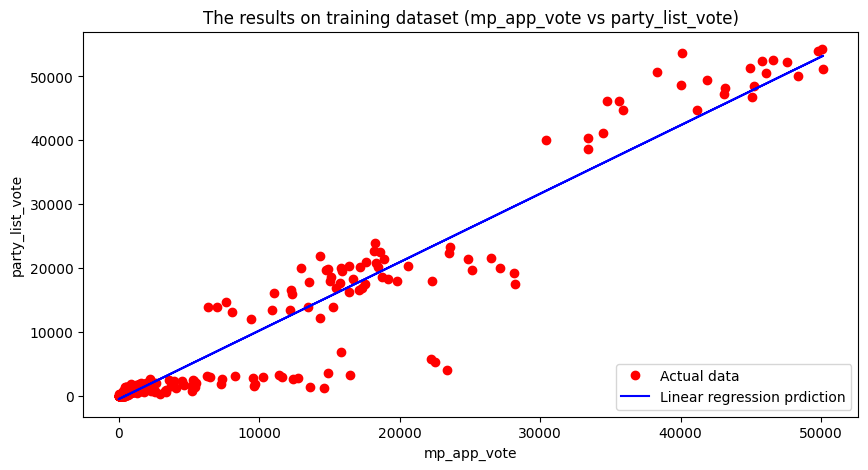

In [86]:
#Predict on training set
y_pred_4 = model_linear_4.predict(x_train_4)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote vs party_list_vote)')
plt.xlabel('mp_app_vote')
plt.ylabel('party_list_vote')
plt.plot(x_train_4,y_train_4,'or',label = 'Actual data')
plt.plot(x_train_4,y_pred_4,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [87]:
# Model measurement on training dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train_4,y_pred_4),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train_4,y_pred_4),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train_4,y_pred_4)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train_4,y_pred_4),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train_4,y_pred_4)),4)) #R-Square

MAE =  1705.2272
MSE =  11183238.166
RMSE =  3344.1349
MAPE =  715.8036
R-Square =  0.9636


### Predict on testing set

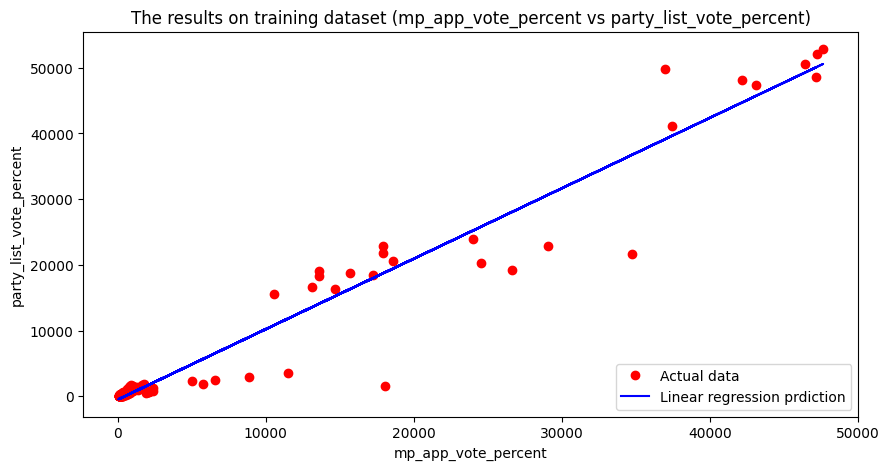

In [89]:
#Predict on training set
y_pred_4 = model_linear_4.predict(x_test_4)

#Plot lineae regression line vs actual data on testining set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (mp_app_vote_percent vs party_list_vote_percent)')
plt.xlabel('mp_app_vote_percent')
plt.ylabel('party_list_vote_percent')
plt.plot(x_test_4,y_test_4,'or',label='Actual data')
plt.plot(x_test_4,y_pred_4,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("MAE = ",round(metrics.mean_absolute_error(y_test_4,y_pred_4),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test_4,y_pred_4),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test_4,y_pred_4)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test_4,y_pred_4),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test_4,y_pred_4)),4)) #R-Square